In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Airline_customer_satisfaction.csv")

In [4]:
#verinin ilk 5 satırını inceleyelim
print(df.head())

  satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  ...  Online support  Ease of Online booking  \
0               0              2  ...               2                       3   
1             

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [6]:
print(df.isnull().sum())

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [7]:
#K-Nearest Neighbors (KNN) yöntemi, benzer veri noktalarına dayanarak eksik değerleri doldurur.
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df.select_dtypes(include=['float64', 'int64']))
df[df.select_dtypes(include=['float64', 'int64']).columns] = df_imputed


In [8]:
print(df.isnull().sum())

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


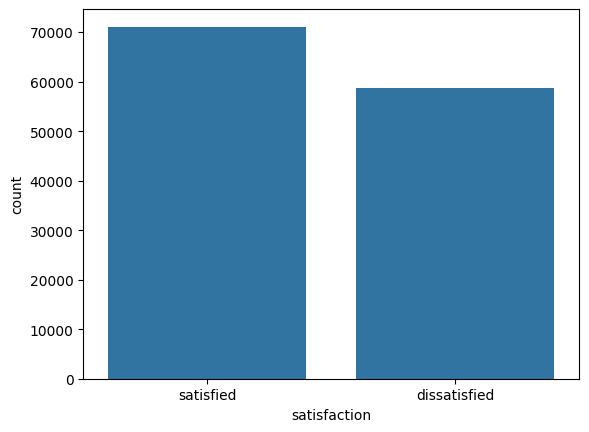

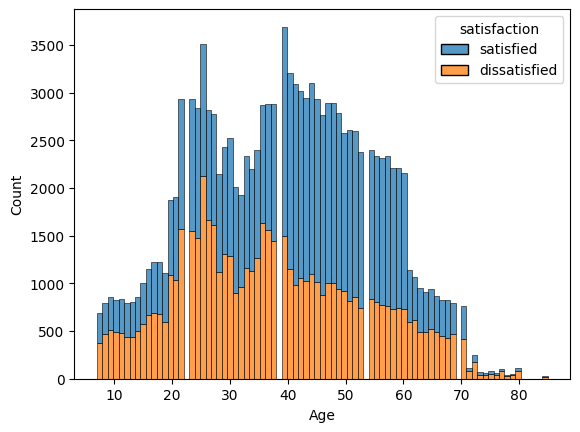

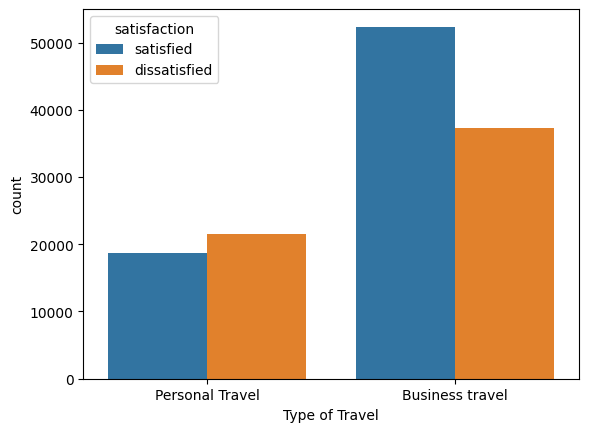

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='satisfaction', data=df)
plt.show()

sns.histplot(data=df, x='Age', hue='satisfaction', multiple='stack')
plt.show()

sns.countplot(x='Type of Travel', hue='satisfaction', data=df)
plt.show()


In [17]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['Age Binned'] = kbins.fit_transform(df[['Age']])


In [24]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesini oluşturma
label_encoder = LabelEncoder()

# Örneğin, 'satisfaction' sütununu dönüştürme
df['satisfaction'] = label_encoder.fit_transform(df['satisfaction'])

# 'Type of Travel' sütununu dönüştürme
df['Type of Travel'] = label_encoder.fit_transform(df['Type of Travel'])

# 'Class' sütununu dönüştürme
df['Class'] = label_encoder.fit_transform(df['Class'])


In [25]:
# 'Customer Type' sütununu dönüştürme
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 1, 'Disloyal Customer': 0})

# NaN değerleri 0 olarak doldurma
df['Customer Type'].fillna(0, inplace=True)

# 'Customer Type' sütununu int'e dönüştürme
df['Customer Type'] = df['Customer Type'].astype(int)

normalleştirilmiş veri setinde Customer Type ve Departure/Arrival time convenient gibi bazı özellikler sabit değerlere sahip olabilir ve bu nedenle kaldırılabilirler.

In [38]:
# Veri çerçevesinden belirli sütunları kaldırma
df.drop(columns=['Customer Type', 'Departure/Arrival time convenient'], inplace=True)


In [39]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   satisfaction                129880 non-null  float64
 1   Age                         129880 non-null  float64
 2   Type of Travel              129880 non-null  float64
 3   Class                       129880 non-null  float64
 4   Flight Distance             129880 non-null  float64
 5   Seat comfort                129880 non-null  float64
 6   Food and drink              129880 non-null  float64
 7   Gate location               129880 non-null  float64
 8   Inflight wifi service       129880 non-null  float64
 9   Inflight entertainment      129880 non-null  float64
 10  Online support              129880 non-null  float64
 11  Ease of Online booking      129880 non-null  float64
 12  On-board service            129880 non-null  float64
 13  Leg room servi

In [40]:
# Sayısal sütunları seçme
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# IQR yöntemiyle aykırı değerleri belirleme
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))


In [41]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri sınırlama
df[numeric_columns] = np.where(df[numeric_columns] < lower_bound, lower_bound, df[numeric_columns])
df[numeric_columns] = np.where(df[numeric_columns] > upper_bound, upper_bound, df[numeric_columns])


In [47]:
from sklearn.preprocessing import StandardScaler

# Min-Max Normalizer nesnesini oluşturma
scaler = StandardScaler()

# Sayısal sütunları normalize etme
normalized_data = scaler.fit_transform(df[numeric_columns])


In [48]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

# VarianceThreshold ile özellik seçimi
selector_variance = VarianceThreshold(threshold=0.01)
normalized_selected_variance = selector_variance.fit_transform(normalized_data)

# SelectKBest ile özellik seçimi
selector_kbest = SelectKBest(score_func=f_classif, k=10)  # Örneğin, en iyi 10 özelliği seçelim
normalized_selected_kbest = selector_kbest.fit_transform(normalized_data, df['satisfaction'])

# RFE ile özellik seçimi
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()  # Estimator olarak Logistic Regression kullanıyoruz
selector_rfe = RFE(estimator, n_features_to_select=10, step=1)
normalized_selected_rfe = selector_rfe.fit_transform(normalized_data, df['satisfaction'])

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Bağımsız değişkenler (X) ve hedef değişken (y) olarak ayır
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [54]:
# Eğitim ve test verisi olarak veri setini bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Naive Bayes modelini eğit
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# K-NN modelini eğit
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# ID3 modelini eğit
id3_model = DecisionTreeClassifier()
id3_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [56]:
# Naive Bayes ile tahminler yap
nb_predictions = nb_model.predict(X_test)

# K-NN ile tahminler yap
knn_predictions = knn_model.predict(X_test)

# ID3 ile tahminler yap
id3_predictions = id3_model.predict(X_test)


In [62]:
from sklearn.metrics import confusion_matrix

# Metrikler için bir fonksiyon oluşturun
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, confusion

# Naive Bayes için metrikleri ve karışıklık matrisini hesaplayın
nb_accuracy, nb_precision, nb_recall, nb_f1, nb_confusion = evaluate_model(y_test, nb_predictions)

# K-NN için metrikleri ve karışıklık matrisini hesaplayın
knn_accuracy, knn_precision, knn_recall, knn_f1, knn_confusion = evaluate_model(y_test, knn_predictions)

# ID3 için metrikleri ve karışıklık matrisini hesaplayın
id3_accuracy, id3_precision, id3_recall, id3_f1, id3_confusion = evaluate_model(y_test, id3_predictions)

# Metrikleri ve karışıklık matrislerini yazdırın
print("Naive Bayes:")
print("Doğruluk:", nb_accuracy)
print("Hassasiyet:", nb_precision)
print("Duyarlılık:", nb_recall)
print("F1 Skoru:", nb_f1)
print("Karışıklık Matrisi:")
print(nb_confusion)
print("\nK-NN:")
print("Doğruluk:", knn_accuracy)
print("Hassasiyet:", knn_precision)
print("Duyarlılık:", knn_recall)
print("F1 Skoru:", knn_f1)
print("Karışıklık Matrisi:")
print(knn_confusion)
print("\nID3:")
print("Doğruluk:", id3_accuracy)
print("Hassasiyet:", id3_precision)
print("Duyarlılık:", id3_recall)
print("F1 Skoru:", id3_f1)
print("Karışıklık Matrisi:")
print(id3_confusion)


Naive Bayes:
Doğruluk: 0.8080920850015398
Hassasiyet: 0.8228892277831693
Duyarlılık: 0.830081812460667
F1 Skoru: 0.8264698715494135
Karışıklık Matrisi:
[[ 9120  2555]
 [ 2430 11871]]

K-NN:
Doğruluk: 0.9091469048352325
Hassasiyet: 0.9359620299379335
Duyarlılık: 0.8963009579749668
F1 Skoru: 0.9157022431775967
Karışıklık Matrisi:
[[10798   877]
 [ 1483 12818]]

ID3:
Doğruluk: 0.9289344009855252
Hassasiyet: 0.9347901975843049
Duyarlılık: 0.9362282357877072
F1 Skoru: 0.935508664058133
Karışıklık Matrisi:
[[10741   934]
 [  912 13389]]


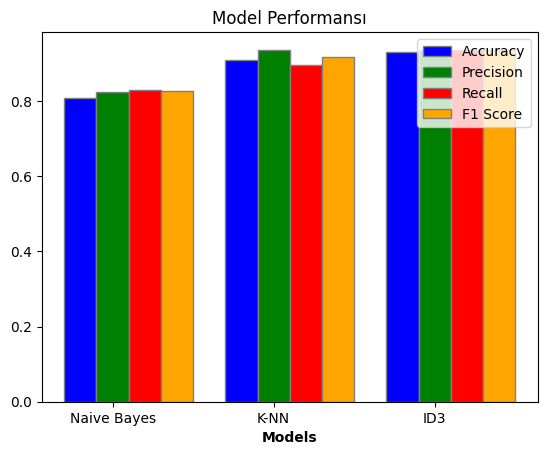

In [63]:
import matplotlib.pyplot as plt

# Modellerin isimleri
models = ['Naive Bayes', 'K-NN', 'ID3']

# Doğruluk, Hassasiyet, Duyarlılık ve F1 skorları
accuracy_scores = [nb_accuracy, knn_accuracy, id3_accuracy]
precision_scores = [nb_precision, knn_precision, id3_precision]
recall_scores = [nb_recall, knn_recall, id3_recall]
f1_scores = [nb_f1, knn_f1, id3_f1]

# Grafik için yükseklik
barWidth = 0.2

# Doğruluk, Hassasiyet, Duyarlılık ve F1 skorlarını içeren bir bar grafiği oluşturun
r1 = range(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, accuracy_scores, color='b', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_scores, color='g', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recall_scores, color='r', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='orange', width=barWidth, edgecolor='grey', label='F1 Score')

# x etiketleri
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)

# Başlık ve etiketler
plt.title('Model Performansı')
plt.legend()

# Grafik göster
plt.show()


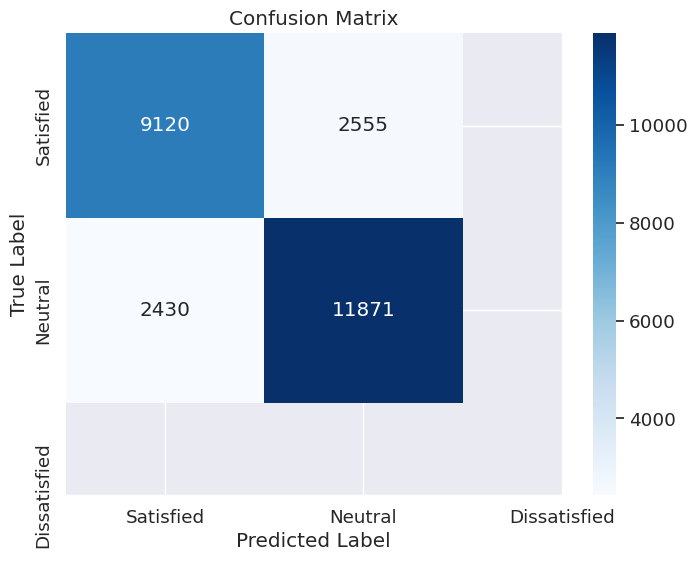

In [64]:
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Matris boyutunu artırır

    # Renkli matrisi çizme
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Naive Bayes için karışıklık matrisini çizme
plot_confusion_matrix(nb_confusion, ['Satisfied', 'Neutral', 'Dissatisfied'])


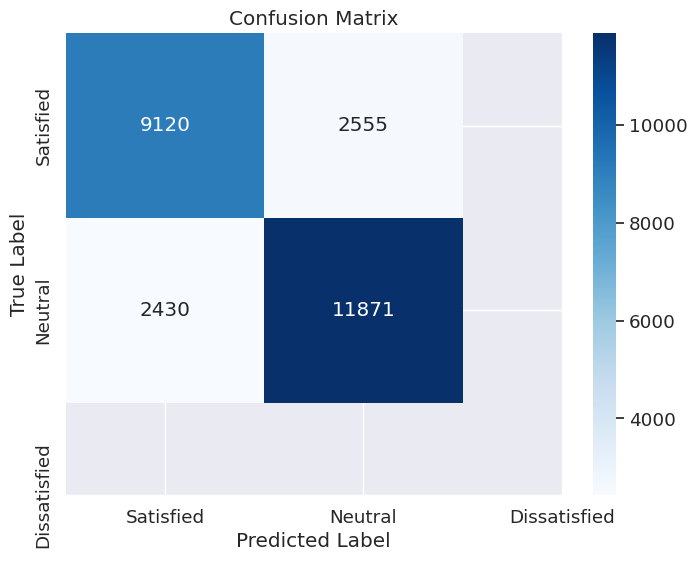

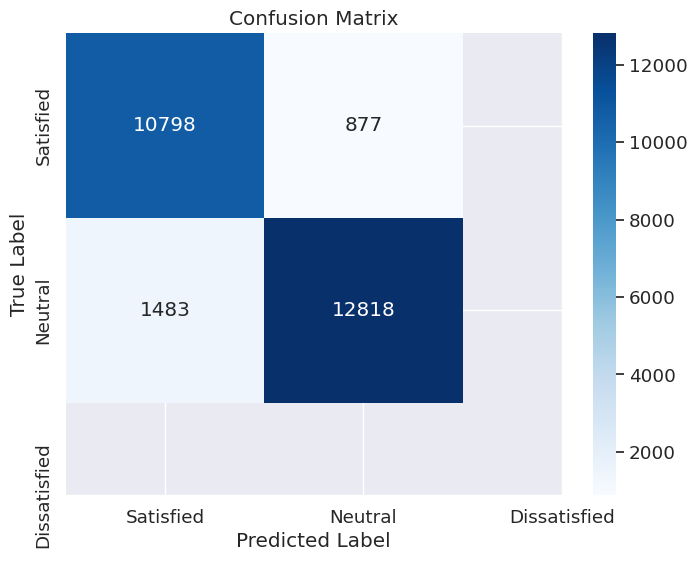

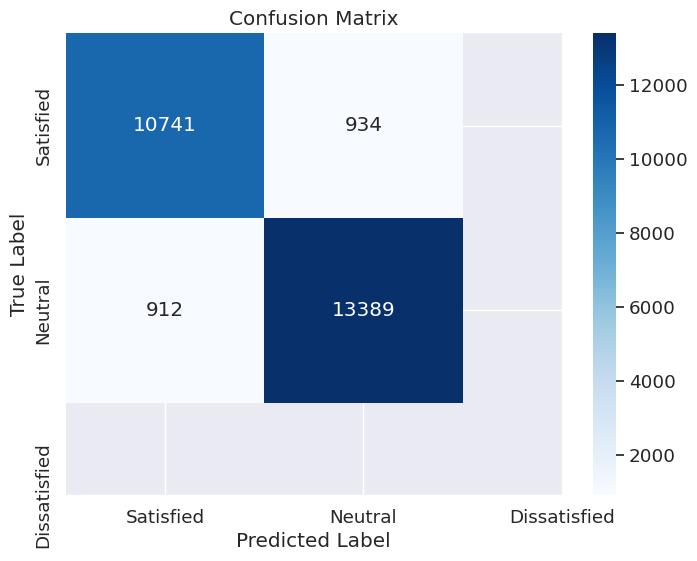

In [65]:
# Naive Bayes için karışıklık matrisi
plot_confusion_matrix(nb_confusion, ['Satisfied', 'Neutral', 'Dissatisfied'])

# K-NN için karışıklık matrisi
plot_confusion_matrix(knn_confusion, ['Satisfied', 'Neutral', 'Dissatisfied'])

# ID3 için karışıklık matrisi
plot_confusion_matrix(id3_confusion, ['Satisfied', 'Neutral', 'Dissatisfied'])
